# SHAP: Understanding the Functioning of an ML-based (XGBoost) Bipolar Disorder Crisis Predictor Model

In this tutorial, you will learn how to apply eXplainable methods to machine learning models for tabular data. The goal is to understand how the models operate and what are the main criterias used for the decision making. Since we are working with tabular data, we will consider a  very familiar use-case.

In particular, we are going to focus on a specific explanation model called SHapley Additive exPlanations, SHAP (https://arxiv.org/pdf/1705.07874.pdf). It will be implemented using the framework developed by Lundberg in https://github.com/slundberg/shap. 

Based on game theory, SHAP considers each feature as a "player" in a cooperative game. In a nutshell, what SHAP does is quantifying the contribution that each feature brings to the prediction given by the model.

In this notebook we will learn how the SHAP values are computed mathematically with a simple example and then focus on a critical aplication of Machine Learning models: Bipolar Disorder Crisis Prediction.



### Shapley values: Definition

One of the main contribution of SHAP is to consider the explanation as a model itself. The explanation model is a linear function of a binary variable:


\begin{equation}
g(z') = \phi_0 + \sum_{i=1}^{M}\phi_i z'_i
\end{equation}

where $z' \in \{0,1\}^M $, M is the number of simplified features, and $\phi_i \; in \; \mathbb{R}$. *z'* represents the simplified features vector, $\phi_i $ is the feature attribution for feature *i*.

\begin{equation}
\phi_i = \sum_{S \subseteq F \ \{i\}} \frac{\mid S\mid! (\mid F\mid - \mid S\mid - 1)!}{\mid F\mid !} [f_{S \bigcup \{i\}}(x_{S \bigcup \{i\}}) - f_S(x_S)]
\end{equation}

where $f$ represents the model function, and $S \subseteq F $, where $F$ is the set of all features and $S$ a subset of $F$. Shap values are a weighted average of all possible difference subsets. $\mid S \mid$ represents the number of elements of subset $S$.


To be able to understand the Shap values, what they mean and how they are computed, we are going to consider a simple example: Let's imagine we have a model (any machine learning model) that outputs the  probability of not paying your credit given a set of 3 features (for instance age, localization and income).

SHAP values consider each combiniation or coalition of players (i.e., features) to determine the importance of a single player (i.e., features). As we are considering a simple set of 3 features, the number of different models with different sets of features we have to build are $2^3$. It is important to remark that all models are constructed with the same hyperparameters.



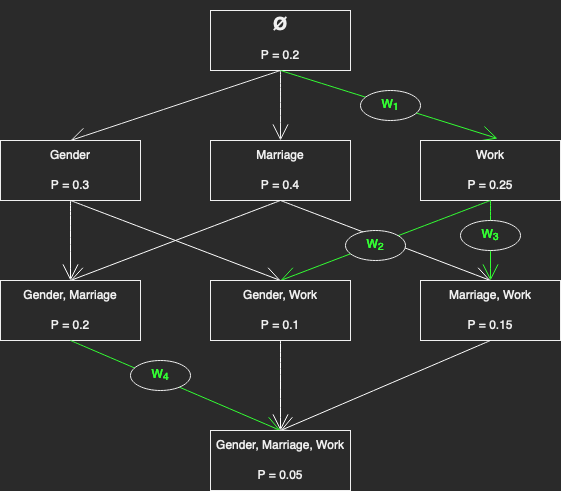

The output of the empty set ($\phi_0)$ is the number of total positive class cases over the number of data points. In this simple example the number of positive classes is 0.2. Now let's take a look on how the prediction of the model changes when we add the feature income for a single datapoint $x$. The considered set is the empty set. 

$S_0 = \{\emptyset\}$

$f_{S_0}(x_{S_0}) = 0.2$

$f_{S_0 \bigcup \{work\}}(x_{S_0 \bigcup \{work\}}) = 0.25$

Now we consider all subsets of $F$ that that do not contain the feature *income*  ($S \subseteq F \ \{i\}$) and check the difference on the model's output when we consider the same subset, but adding the feature income. 

$S_1 = \{gender\}$

$f_{S_1}(x_{S_1}) = 0.3$

$f_{S_1 \bigcup \{work\}}(x_{S_1 \bigcup \{work\}}) = 0.25$


$S_2 = \{Marriage\}$

$f_{S_2}(x_{S_2}) = 0.4$

$f_{S_2 \bigcup \{work\}}(x_{S_2 \bigcup \{work\}}) = 0.15$

$S_3 = \{Marriage, gender\}$

$f_{S_3}(x_{S_3}) = 0.2$

$f_{S_3 \bigcup \{work\}}(x_{S_3 \bigcup \{work\}}) = 0.05$

Once we find all model outputs for all different susbsets, we compute a weighted average of the model's output, with and without the feature.

The criteria the weights have to meet are the following:
  1. $\sum_{i} w_i = 1$
  2. $w_1 = w_2 + w_3 = w_4$

As mentioned above we are just considering the impact of the feature *income* in the model's outcome. To obtain the Shap values for the rest of the features we repeat the same strategy.

Let's apply the formula to obtain the Shap values $\phi_i$. Since we have four subsets that do not contain the feature *income*, we are going to feature attribution for each subset.

Feature attribution for $S_0$:

\begin{equation}
\frac{\mid S_0\mid! (\mid F\mid - \mid S_0\mid - 1)!}{\mid F\mid !} [f_{S_0 \bigcup \{i\}}(x_{S_0 \bigcup \{i\}}) - f_{S_0}(x_{S_0})] = \frac{0! (3 - 0 - 1)!}{3!} [0.25-0.2] = \frac{1}{3}0.05
\end{equation}

Now we repeat the same computation for $S_1$ , $S_2$, and $S_3$

For $S_1$: $\frac{1}{6}(-0.05)$

For $S_2$: $\frac{1}{6}(-0.25)$

For $S_3$: $\frac{1}{3}(-0.15)$

$\phi_i = \frac{1}{3}0.05 + \frac{1}{6}(-0.05) + \frac{1}{6}(-0.25) + \frac{1}{3}(-0.15) = -\frac{1}{6}0.5$

## Use Case: Bipolar Disease Crisis Prediction

Now that we know how to compute Shap values to understand the model, we are going to focus on a critical use case that directly impacts us in our daily economic activity: Bipolar Disease Crisis Prediction.

Bipolar disorder, formerly called manic depression, is a mental health condition that causes extreme mood swings that include emotional highs (mania or hypomania) and lows (depression) which often come accompanied by different features (i.e., physical and psychological features).

In this notebook we will create a Bipolar Disease Crisis Prediciton Model using the data available [here](https://datasets.simula.no/depresjon/) and then apply XAI method SHAP to help psychiatrists to understand the causes behind a potential patient tendency towards a mania or depression episode.


The use case is organized as follows:
1. We load the processed data.
2. We develop a Machine Learning based model for the bipolar disease prediction: the [XGBoost](https://arxiv.org/abs/1603.02754).
3. We apply SHAP Values (https://github.com/slundberg/shap) to explain the ML model outputs


In [ ]:
################## Downdload the git repository ############
! git clone https://github.com/ayoubelqadi/xai-tutorial.git

Cloning into 'xai-tutorial'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 94 (delta 20), reused 86 (delta 18), pack-reused 0
Unpacking objects: 100% (94/94), done.


In [ ]:
######### Change  directory for running the data processing scripts
import os
os.chdir('xai-tutorial/notebooks')

In [ ]:
%run ../src/setup.py
%run ../src/process_data.py

### Setting the Environment

In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

pd.set_option("max_rows", 500)
pd.set_option("max_columns", 500)


import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=16)

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import model_selection



In [ ]:
path_features = "../data/features.csv"
path_target = "../data/target.csv"
features = pd.read_csv(path_features)
target = pd.read_csv(path_target)

In [ ]:
#####Transform age and education range
def transform_range(df: pd.DataFrame):

  df["age"] = df["age"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if isinstance(x, str) else x)
  df["edu"] = df["edu"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if isinstance(x, str) else x)
  
  return df

In [ ]:
features = transform_range(features)

In [ ]:
features.sample(n=3)

,days,gender,age,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity_mean,activity_std
8,13,2,47.0,NaN,2.0,8.0,1.0,2.0,26.0,26.0,289.151,348.722
18,13,1,32.0,1.0,1.0,8.0,1.0,2.0,27.0,25.0,171.471,220.950
12,14,2,37.0,2.0,2.0,13.0,2.0,2.0,18.0,13.0,390.093,383.131


**Target Distribution**


- Bipolar II: **1**

- Unipolar Depressive: **0** 

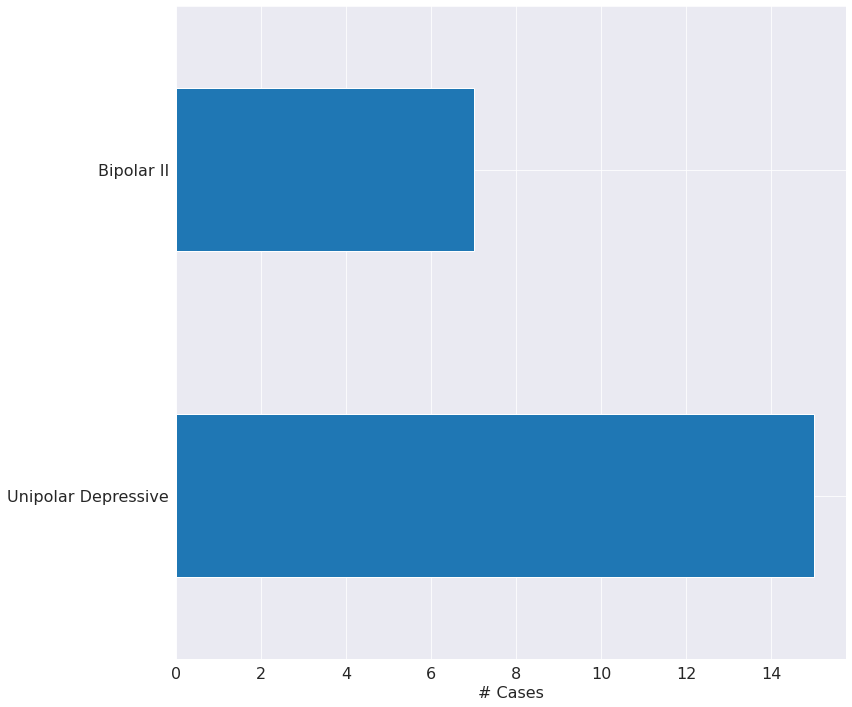

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,12))
counter = target["afftype"].value_counts()
counter.rename(index={1.0: "Bipolar II", 
                       0.0: "Unipolar Depressive"},
               inplace=True
              )
ax.set_xlabel("# Cases", size=16)
counter.plot(kind="barh", ax=ax)


In [ ]:
x, y = features, target

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=80,
                                                                    stratify=target)

In [ ]:
x_train

,days,gender,age,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity_mean,activity_std
7,5,2,27.0,NaN,2.0,13.0,1.0,2.0,20.0,16.0,316.545,503.483
15,16,1,47.0,2.0,2.0,13.0,1.0,2.0,13.0,17.0,338.069,424.913
18,13,1,32.0,1.0,1.0,8.0,1.0,2.0,27.0,25.0,171.471,220.950
8,13,2,47.0,NaN,2.0,8.0,1.0,2.0,26.0,26.0,289.151,348.722
13,14,1,62.0,2.0,2.0,8.0,2.0,2.0,28.0,19.0,205.845,262.523
1,18,2,42.0,2.0,2.0,8.0,2.0,2.0,24.0,11.0,153.673,330.808
16,13,1,52.0,2.0,2.0,8.0,1.0,2.0,17.0,15.0,147.850,211.517
5,7,1,37.0,2.0,2.0,8.0,1.0,2.0,18.0,15.0,361.821,382.775
2,13,1,47.0,2.0,2.0,8.0,2.0,2.0,24.0,25.0,265.300,399.881
10,14,1,47.0,2.0,2.0,8.0,1.0,2.0,24.0,24.0,300.669,369.657


In [ ]:
proportion_class = counter["Unipolar Depressive"]/counter["Bipolar II"]

params_xgb = {
    "n_estimators": 200,
    "max_depth": 8, 
    "learning_rate": 0.05,
    "scale_pos_weight": proportion_class
}
xgb = XGBClassifier(**params_xgb, use_label_encoder=True)
xgb.fit(x_train, y_train)

XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=200,
              scale_pos_weight=2.142857142857143, use_label_encoder=True)

Text(0.5, 1.0, 'Confusion Matrix (Train set)')

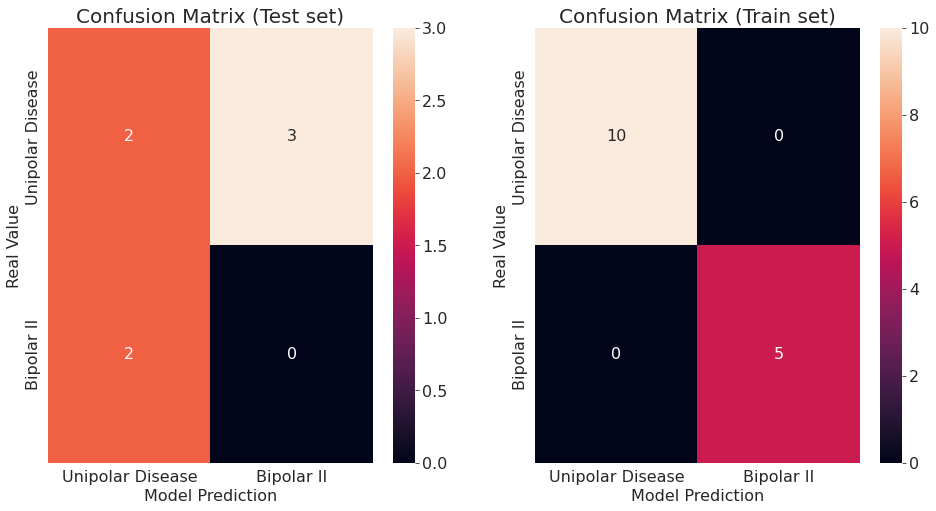

In [ ]:
y_hat = xgb.predict(x_test)
cf = metrics.confusion_matrix(y_pred=y_hat, y_true=y_test)
cf_train = metrics.confusion_matrix(y_pred=xgb.predict(x_train), y_true=y_train)
names_df = [
    "Unipolar Disease",
    "Bipolar II"
]
cf_df = pd.DataFrame(data=cf, columns=names_df, index=names_df)
cf_train_df = pd.DataFrame(data=cf_train, columns=names_df, index=names_df)
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

sns.heatmap(cf_df, fmt="d",annot=True, ax=ax[0])
ax[0].set_xlabel("Model Prediction", size=16)
ax[0].set_ylabel("Real Value", size=16)
ax[0].set_title("Confusion Matrix (Test set)", size=20)

sns.heatmap(cf_train_df, fmt="d",annot=True, ax=ax[1])
ax[1].set_xlabel("Model Prediction", size=16)
ax[1].set_ylabel("Real Value", size=16)
ax[1].set_title("Confusion Matrix (Train set)", size=20)

## SHAP Values

Now we are going to use what we learnt from the SHAP values to understand how our model works. We use the framework developed by Lundberg et al. https://github.com/slundberg/shap 

In [ ]:
#Run if shap not installed
! pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

**We are going to explain the xgboost model. Since the model developed previously is a tree based we are going to use Tree explainer, a fast implementation to compute Shap values when models are tree based**

In [ ]:
explainer = shap.TreeExplainer(xgb, x, model_output = "raw")
shap_values = explainer.shap_values(x)

**Local interpretability: How do we interpret the SHAP force plot?**


The value we observe in bold is the natural logarithm of the odd ratio $ln(\frac{P(Y=1)}{1-P(Y=1)})$. The base value is the odd ratio if we just consider the number of positive cases over the total of instances. The Shapley values can be understood as forces that push the output of the model. Forces of Shapley values in blue represent the features that increase the probability of default, while red values represent the features that are incrementing the probability of having a bipolar disease. 

A force plot allows us to study a concrete case in order to give a reason for diagnosing a potential bipolar disease.

In [ ]:
shap.initjs()
patient_index = 11
shap.force_plot(explainer.expected_value, shap_values[patient_index,:], x.iloc[patient_index,:])

In [ ]:
patient_index = 2

# Patient real target value
diagnosis_map = {1.0: "Bipolar II", 
                0.0: "Unipolar Depressive"}
print("-------Patient Real Diagnosis------")

print(y.replace(diagnosis_map).iloc[patient_index].values[0])
print("-------Patient Predicted Diagnosis------")
pred_class = xgb.predict(x.loc[patient_index:patient_index, :])[0]
if pred_class==0.0:
    pred_diagnosis = diagnosis_map[0.0]
    p1 = xgb.predict_proba(x.loc[patient_index:patient_index, :])[0][0]
    p1_round = round(p1,3)
else:
    pred_diagnosis = diagnosis_map[1.0]
    p1 = clf_rf.predict_proba(x.loc[patient_index:patient_index, :])[0][1]
    p1_round = round(p1,3)
print(f'Probability of being diagnosed with a {pred_diagnosis} \n{p1_round}')


-------Patient Real Diagnosis------
Unipolar Depressive
-------Patient Predicted Diagnosis------
Probability of being diagnosed with a Unipolar Depressive 
0.9350000023841858


**Global interpretability: SHAP Summary plot.**

The SHAP summary plot allows us to understand the model by ranking the features from the most relevant to the least important ones. Each datapoint represents a different person. In this concrete use case, the most relevant feature are: the variation of the activity mesasurements obtained of the actigraph watch, the Montgomery Asberg Depression Rating Scale at the moment the actigraph was stopped. High values of these features impact negatively in the output of the model (the probability of having a bipolar disease increases). 

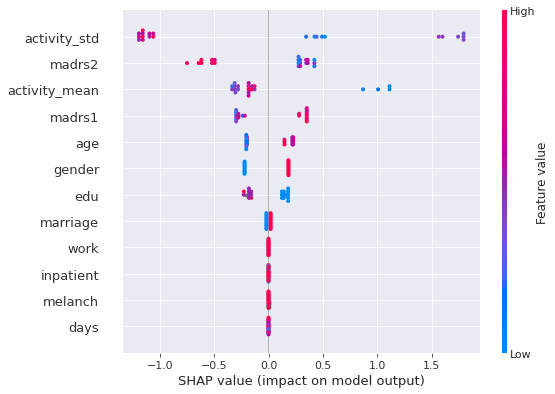

In [ ]:
shap.summary_plot(shap_values, x, show=False)

plt.savefig("shap_summary_plot.png", bbox_inches="tight")